In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as dplt

df = pd.read_csv('data/fish.csv')

In [3]:
df.head() #위에서부터 5개 행 출

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [8]:
cond = df['Species'].isin(['Bream','Smelt']) #이름을 바꿔야돼 이게 무슨 소리냐면 'species'라는 것 안에 bream, smelt 라는 종의 이름이 있는게 있나요? 
fish_data = df.loc[cond, ['Length2', 'Weight']]
fish_target = df.loc[cond, ['Species']]

In [10]:
fish_target.head()
#이게 무슨 소리냐면 일단 우리가 머신러닝을 하려면 결국 뭔가를 예측해야하는건데
그걸 target으로 두는거야 근데 여기서는 우리가 종을 예측하고자 하는거지 
저 물고기의 길이랑 무게로 근데 전체 데이터가 50개인데 머신러닝은 먼저 데이터를 학습시켜야하니까 데이터를 훈련 데이터랑 test 데이터로 나눠야돼 지금 그거 배우는 중

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream


In [11]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(fish_data, fish_target['Species'], stratify = fish_target, random_state=42) #총 4개의 데이터로 나눔 

In [44]:
X_train.shape

(36, 2)

In [45]:
y_train.shape

(36,)

In [46]:
 X_test.shape

(13, 2)

In [47]:
y_test.shape

(13,)

In [90]:
y_test

25     Bream
22     Bream
34     Bream
158    Smelt
156    Smelt
18     Bream
151    Smelt
20     Bream
147    Smelt
28     Bream
7      Bream
14     Bream
6      Bream
Name: Species, dtype: object

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [69]:
knn.score(X_test, y_test) #우리 결과 100%다 이 모델은 모든 것을 예측할 수 있다 ? 

1.0

In [70]:
knn_score = []
for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  score = knn.score(X_test, y_test)
  knn_score.append(score)
  print(f'k_neighbors가 {i}일 때 정확도는 {score}입니다.')

k_neighbors가 1일 때 정확도는 1.0입니다.
k_neighbors가 2일 때 정확도는 1.0입니다.
k_neighbors가 3일 때 정확도는 1.0입니다.
k_neighbors가 4일 때 정확도는 1.0입니다.
k_neighbors가 5일 때 정확도는 1.0입니다.
k_neighbors가 6일 때 정확도는 1.0입니다.
k_neighbors가 7일 때 정확도는 1.0입니다.
k_neighbors가 8일 때 정확도는 1.0입니다.
k_neighbors가 9일 때 정확도는 1.0입니다.


In [71]:
knn.predict([[20, 150]])

C:\Users\82104\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

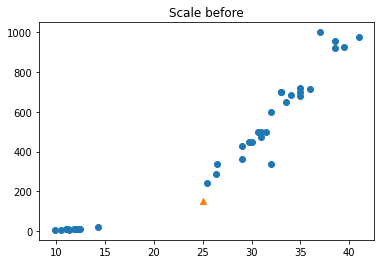

In [72]:
plt.scatter(X_train['Length2'],X_train['Weight'])#classification이어서 이렇게 나뉘나네
plt.scatter(25,150,marker='^')
plt.title('Scale before')
plt.show()

In [73]:
distance, indexes = knn.kneighbors([[25, 150]]) #25, 150의 이웃 5개를 출력해주는 것임 . 각각 거리를 출력해줌 

C:\Users\82104\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [75]:
indexes

array([[11, 20, 13, 22, 15,  6,  8,  4, 18]], dtype=int64)

In [78]:
n_df = X_train.iloc[indexes[0]]

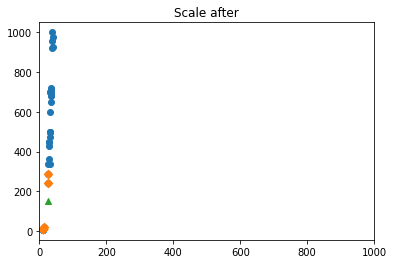

In [80]:
n_df = X_train.iloc[indexes[0]]
plt.scatter(X_train['Length2'],X_train['Weight'])#classification이어서 이렇게 나뉘나네
plt.scatter(n_df['Length2'], n_df['Weight'], marker='D')
plt.scatter(25,150,marker='^')
plt.title('Scale after')
plt.xlim(0,1000)
plt.show()

- x 값은 크게 상관이 없고 y 값이 큰 영향을 미치고 있었음 .. 

In [81]:
mean  = X_train.mean()
std = X_train.std()

In [82]:
X_train.head()

,Length2,Weight
26,35.0,720.0
3,29.0,363.0
150,11.3,8.7
9,30.7,500.0
149,11.2,9.8


In [83]:
(X_train - mean).head()

,Length2,Weight
26,8.066667,278.016667
3,2.066667,-78.983333
150,-15.633333,-433.283333
9,3.766667,58.016667
149,-15.733333,-432.183333


In [85]:
train_scaled = ((X_train - mean) /std )

In [86]:
new = (([25, 150] - mean) /std )

In [87]:
test_scaled = ((X_test - mean) /std )

In [93]:
knn.fit(train_scaled, y_train)

KNeighborsClassifier(n_neighbors=9)

In [94]:
knn.score(test_scaled, y_test)

1.0

## practice : 펭귄 데이터 연습

In [159]:
import seaborn as sns

df = sns.load_dataset('penguins')

In [160]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [161]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [163]:
df.isnull().sum() #결측값 존재하므로 결측값은 drop 진행

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [164]:
df[df.duplicated()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


In [165]:
df = df.dropna(axis=0) #결측값 드랍해주기 

In [166]:
df['species'].value_counts() # 개수의 불균형이 존재할 수 있음 

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

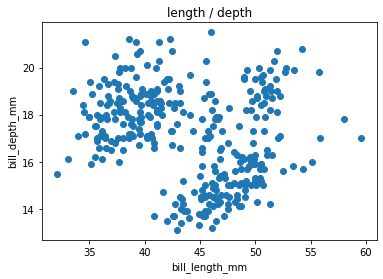

In [118]:
plt.scatter(df['bill_length_mm'],df['bill_depth_mm'])
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')
plt.title('length / depth')
plt.show()

<AxesSubplot:xlabel='species', ylabel='bill_depth_mm'>

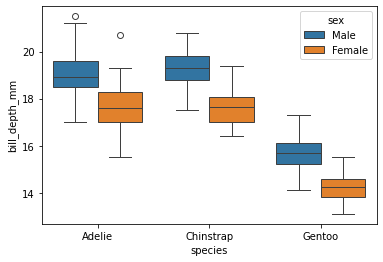

In [121]:
sns.boxplot(data = df, x = 'species', y='bill_depth_mm', hue='sex')

<AxesSubplot:xlabel='species', ylabel='bill_depth_mm'>

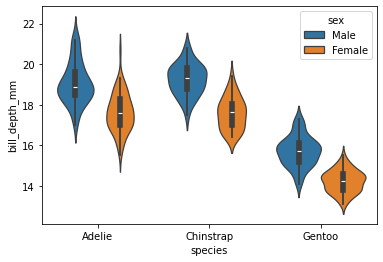

In [122]:
sns.violinplot(data = df, x = 'species', y='bill_depth_mm', hue='sex')

In [119]:
cond = df['species'].isin(['Adelie','Gentoo'])

In [140]:
data = df.loc[cond, ['bill_length_mm','bill_depth_mm']]
target = df.loc[cond, ['species']]

### standardization 

In [167]:
mean = data.mean()
std = data.std()
scaled_data = (data - mean) / std

In [147]:
X_train, X_test, y_train, y_test = train_test_split(data, target['species'], stratify = target, shuffle=True, random_state = 42)

In [148]:
X_train.shape

(109, 2)

In [149]:
y_train.shape

(109,)

In [150]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [151]:
knn_score = []
for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  score = knn.score(X_test, y_test)
  knn_score.append(score)
  print(f'k_neighbors가 {i}일 때 정확도는 {score}입니다.')

k_neighbors가 1일 때 정확도는 1.0입니다.
k_neighbors가 2일 때 정확도는 1.0입니다.
k_neighbors가 3일 때 정확도는 1.0입니다.
k_neighbors가 4일 때 정확도는 1.0입니다.
k_neighbors가 5일 때 정확도는 1.0입니다.
k_neighbors가 6일 때 정확도는 1.0입니다.
k_neighbors가 7일 때 정확도는 1.0입니다.
k_neighbors가 8일 때 정확도는 1.0입니다.
k_neighbors가 9일 때 정확도는 1.0입니다.


In [168]:
X_t, X_te, y_t, y_te = train_test_split(scaled_data, target['species'], stratify = target, shuffle=True, random_state = 42)

In [170]:
kn = KNeighborsClassifier()
kn.fit(X_t, y_t)

KNeighborsClassifier()

In [171]:
kn.score(X_te, y_te)

1.0

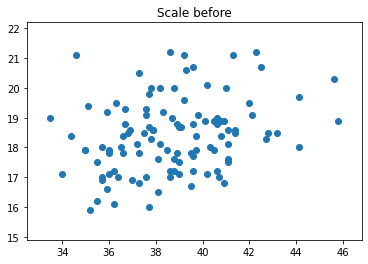

In [183]:
plt.scatter(X_train['bill_length_mm'],X_train['bill_depth_mm'])#classification이어서 이렇게 나뉘나네
#plt.scatter(10,10,marker='^')
plt.title('Scale before')
plt.xlim(X_train['bill_length_mm'].min()-1, X_train['bill_length_mm'].max()+1)
plt.ylim(X_train['bill_depth_mm'].min()-1, X_train['bill_depth_mm'].max()+1)
plt.show()

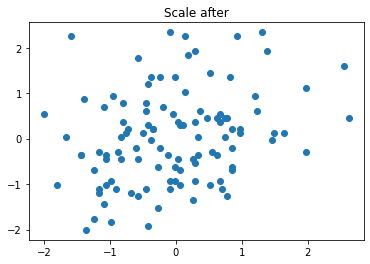

In [179]:
plt.scatter(X_t['bill_length_mm'],X_t['bill_depth_mm'])#classification이어서 이렇게 나뉘나네
#plt.scatter(10,10,marker='^')
plt.title('Scale after')
plt.show()

- 굳이..? 싶기는 하다 ... knn이어서 그런듯이라고 생각됨 .. 